In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
# Loading and checking the dataset
df = pd.read_csv("NumerFacts.csv")
df.head()

,rowID,entity,entityLabel,domain,property,propertyLabel,value,roundedValue,unitLabel,sitelinks,dateModified,entityType,question,fileName,sheetName,days_since_last_modified
0,1,http://www.wikidata.org/entity/Q26221172,Enclosed Field with Ploughman,Art & Literature,http://www.wikidata.org/prop/direct/P2284,latest known price,"81,312,500.00","81,312,500.00",United States dollar,2,2024-10-12 15:34:49,work of art,What is the latest known price of the Enclosed...,Art & Literature.xlsx,Art_price,80
1,2,http://www.wikidata.org/entity/Q21075801,Portrait of Frederikke Tuxen,Art & Literature,http://www.wikidata.org/prop/direct/P2284,latest known price,"27,500.00","27,500.00",pound sterling,0,2024-09-02 03:42:15,work of art,What is the latest known price of the Portrait...,Art & Literature.xlsx,Art_price,120
2,3,http://www.wikidata.org/entity/Q111952709,Autograph suit of Sandy Powell,Art & Literature,http://www.wikidata.org/prop/direct/P2284,latest known price,"16,000.00","16,000.00",pound sterling,1,2023-10-19 14:01:13,work of art,What is the latest known price of the Autograp...,Art & Literature.xlsx,Art_price,439
3,4,http://www.wikidata.org/entity/Q3879263,Reclining nude (on the left side) (Amedeo Modi...,Art & Literature,http://www.wikidata.org/prop/direct/P2284,latest known price,"157,159,000.00","157,159,000.00",United States dollar,5,2024-11-11 10:09:38,work of art,What is the latest known price of the Reclinin...,Art & Literature.xlsx,Art_price,50
4,5,http://www.wikidata.org/entity/Q22987848,"Willows by Høje Taastrup village, Denmark",Art & Literature,http://www.wikidata.org/prop/direct/P2284,latest known price,"46,000.00","46,000.00",Danish krone,0,2024-09-26 05:35:43,work of art,What is the latest known price of the Willows ...,Art & Literature.xlsx,Art_price,96


In [42]:
# Dataset info and description
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rowID                     3929 non-null   int64  
 1   entity                    3929 non-null   object 
 2   entityLabel               3929 non-null   object 
 3   domain                    3929 non-null   object 
 4   property                  3929 non-null   object 
 5   propertyLabel             3929 non-null   object 
 6   value                     3929 non-null   float64
 7   roundedValue              3929 non-null   float64
 8   unitLabel                 3789 non-null   object 
 9   sitelinks                 3929 non-null   int64  
 10  dateModified              3929 non-null   object 
 11  entityType                3929 non-null   object 
 12  question                  3929 non-null   object 
 13  fileName                  3929 non-null   object 
 14  sheetNam

,rowID,value,roundedValue,sitelinks,days_since_last_modified
count,"3,929.00","3,929.00","3,929.00","3,929.00","3,929.00"
mean,"1,966.86","16,754,453.96","16,754,453.96",71.34,153.21
std,"1,135.54","274,479,872.13","274,479,872.13",101.52,216.40
min,1.00,"-13,000.00","-13,000.00",0.00,-1.00
25%,983.00,60.20,60.20,9.00,38.00
50%,"1,968.00","1,939.00","1,939.00",24.00,62.00
75%,"2,950.00","36,000.00","36,000.00",77.00,174.00
max,"3,932.00","15,088,000,000.00","15,088,000,000.00",412.00,"1,773.00"


In [43]:
# Convert dateModified to datetime for analysis
df['dateModified'] = pd.to_datetime(df['dateModified'])

# Number of entries
num_entries = df.shape[0]

# Number of unique questions
num_unique_questions = df['question'].nunique()

# Number of unique domains
num_unique_domains = df['domain'].nunique()

# Number of unique properties
num_unique_properties = df['property'].nunique()

# Unique properties per domain
properties_per_domain = df.groupby('domain')['property'].nunique()

# Pivot table: count of entries per property per domain
pivot_table = df.pivot_table(index='domain', columns='propertyLabel', aggfunc='size', fill_value=0)

# Range of dateModified
date_range = (df['dateModified'].min(), df['dateModified'].max())

# Display the computed results
results = {
    "Number of Unique Questions": num_unique_questions,
    "Number of Unique Questions": num_unique_questions,
    "Number of Unique Domains": num_unique_domains,
    "Number of Unique Properties": num_unique_properties,
    "Range of dateModified": date_range
}

results


{'Number of Unique Questions': 3929,
 'Number of Unique Domains': 8,
 'Number of Unique Properties': 37,
 'Range of dateModified': (Timestamp('2020-02-23 16:07:07'),
  Timestamp('2025-01-01 22:41:15'))}

In [22]:
# Pivot table to check domains, entries, properties, mean sitelinks and mean days_since_last_modified
pd.options.display.float_format = '{:,.2f}'.format

pivot = df.groupby(['domain']).agg(
    Count_of_Entries=('rowID', 'size'),
    Average_Values=('roundedValue','mean'),
    Average_Sitelinks=('sitelinks', 'mean'),
    Average_Days_Since_Last_Modified=('days_since_last_modified', 'mean')
).reset_index()

pivot

,domain,Count_of_Entries,Average_Values,Average_Sitelinks,Average_Days_Since_Last_Modified
0,Art & Literature,500,"5,565,236.79",13.12,169.50
1,Demographics,432,"13,161,298.62",313.04,203.03
2,Entertainment,499,"59,426,352.59",27.47,135.86
3,Geography,498,"1,551,434.29",48.00,156.08
4,History,500,"53,761,288.25",89.70,148.89
5,Personalities,500,"1,415.98",44.88,114.85
6,Science,500,"88,651.77",57.78,189.06
7,Sports,500,"15,815.95",9.39,115.13


In [23]:
# Pivot table to check domains, entries, properties, mean rouded value, mean sitelinks and mean days_since_last_modified
pd.options.display.float_format = '{:,.2f}'.format

extended_pivot = df.groupby(['domain', 'propertyLabel']).agg(
    Count_of_Entries=('rowID', 'size'),
    Average_Value=('roundedValue', 'mean'),
    Average_Sitelinks=('sitelinks', 'mean'),
    Average_Days_Since_Last_Modified=('days_since_last_modified', 'mean')
).reset_index()

extended_pivot


,domain,propertyLabel,Count_of_Entries,Average_Value,Average_Sitelinks,Average_Days_Since_Last_Modified
0,Art & Literature,latest known price,66,"42,149,622.42",2.45,248.53
1,Art & Literature,number of pages,61,305.75,1.79,310.15
2,Art & Literature,year of publication,373,"1,942.80",16.86,132.51
3,Demographics,life expectancy,169,71.76,312.67,210.75
4,Demographics,median income,33,"1,897,452.03",341.73,79.73
5,Demographics,population,55,"23,313,230.25",295.13,253.78
6,Demographics,urban population,175,"24,804,715.98",313.61,202.87
7,Entertainment,budget (capital cost),100,"36,030,663.89",39.31,152.11
8,Entertainment,number of episodes,117,48.14,14.86,126.95
9,Entertainment,number of seasons,109,2.81,17.58,94.93


In [28]:
# Summary statistics for values grouped by domain
domain_stats = df.groupby('domain').agg(
    count=('roundedValue', 'count'),
    min_value=('roundedValue', 'min'),
    mean_value=('roundedValue', 'mean'),
    max_value=('roundedValue', 'max'),
    mean_sitelinks=('sitelinks', 'mean'),
    mean_days_since_last_modified=('days_since_last_modified', 'mean')
).reset_index()

domain_stats


,domain,count,min_value,mean_value,max_value,mean_sitelinks,mean_days_since_last_modified
0,Art & Literature,500,4.00,"5,565,236.79","300,000,000.00",13.12,169.50
1,Demographics,432,51.84,"13,161,298.62","901,991,162.00",313.04,203.03
2,Entertainment,499,1.00,"59,426,352.59","1,027,082,707.00",27.47,135.86
3,Geography,498,0.23,"1,551,434.29","275,439,000.00",48.00,156.08
4,History,500,"-13,000.00","53,761,288.25","15,088,000,000.00",89.70,148.89
5,Personalities,500,"-2,100.00","1,415.98","2,023.00",44.88,114.85
6,Science,500,-259.14,"88,651.77","32,802,969.00",57.78,189.06
7,Sports,500,2.00,"15,815.95","3,404,252.00",9.39,115.13


In [34]:
# Extract the 5 highest and 5 lowest 'roundedValue', including domain, propertyLabel, and unitLabel
highest_5 = df.nlargest(5, 'roundedValue')[['domain','entityLabel', 'roundedValue', 'propertyLabel', 'unitLabel']]
highest_5



,domain,entityLabel,roundedValue,propertyLabel,unitLabel
2415,History,Hurricane Matthew,"15,088,000,000.00",cost of damage,United States dollar
2419,History,1989 Loma Prieta earthquake,"5,800,000,000.00",cost of damage,United States dollar
2418,History,Typhoon Soudelor,"4,090,000,000.00",cost of damage,dollar
2416,History,1999 Sydney hailstorm,"1,700,000,000.00",cost of damage,Australian dollar
982,Entertainment,Star Wars: Episode I – The Phantom Menace,"1,027,082,707.00",worldwide box office earnings,United States dollar


In [35]:
# The 5  lowest values from the NumerFacts dataset
lowest_5 = df.nsmallest(5, 'roundedValue')[['domain','entityLabel', 'roundedValue', 'propertyLabel', 'unitLabel']]
lowest_5

,domain,entityLabel,roundedValue,propertyLabel,unitLabel
2424,History,Cave of Altacosa,"-13,000.00",year of inception,NaN
2428,History,Bull Headed Lyre of Ur,"-2,449.00",year of inception,NaN
2670,Personalities,Henhenet,"-2,100.00",year of death,NaN
2603,Personalities,Amenemhat IV,"-1,789.00",year of death,NaN
2674,Personalities,Herodotus,-424.00,year of death,NaN


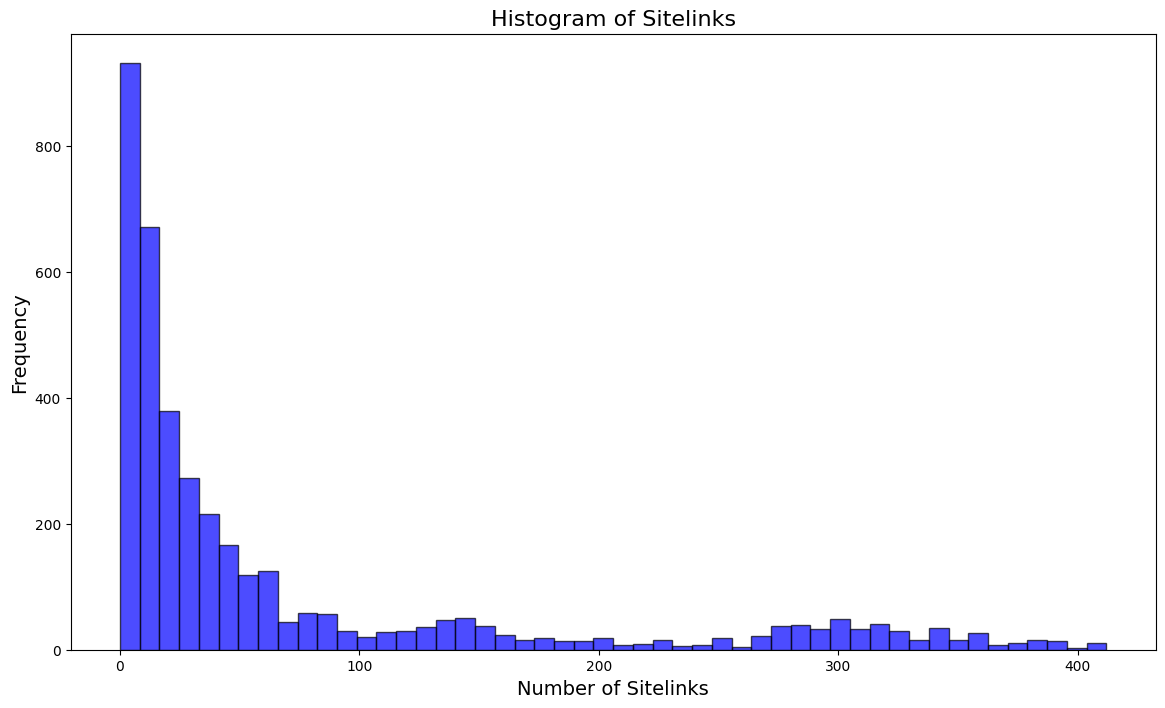

In [38]:
# Histogram of Sitelinks
plt.figure(figsize=(14, 8))
plt.hist(df['sitelinks'], bins=50, edgecolor='black', color='blue', alpha=0.7)
plt.title('Histogram of Sitelinks', fontsize=16)
plt.xlabel('Number of Sitelinks', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


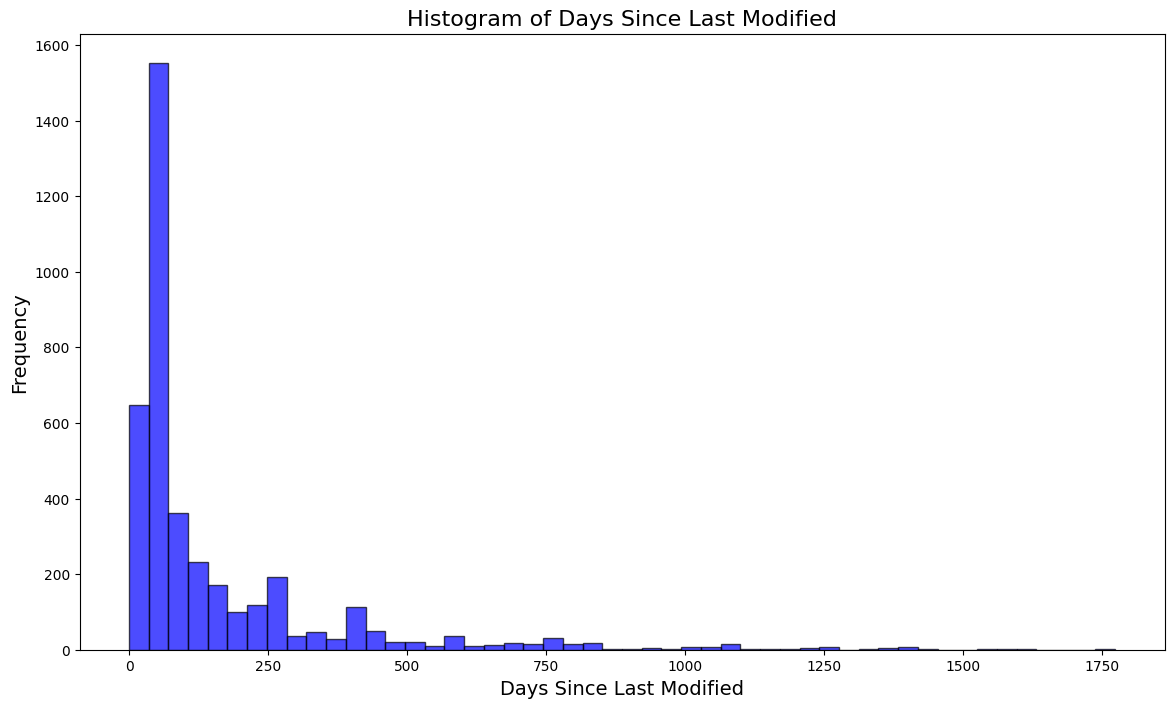

In [39]:
# Histogram for days_since_last_modified

# Plot histogram for 'days_since_last_modified'
plt.figure(figsize=(14, 8))
plt.hist(df['days_since_last_modified'], bins=50, edgecolor='black', color='blue', alpha=0.7)
plt.title('Histogram of Days Since Last Modified', fontsize=16)
plt.xlabel('Days Since Last Modified', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [10]:
# Modify the formatter to only abbreviate large numbers (Millions and above)
def format_large_tick(x, _):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x:.0f}'


In [ ]:
import matplotlib.ticker as ticker

# Plotting the overall distribution of `roundedValue`
plt.figure(figsize=(10, 6))
sns.histplot(df['roundedValue'], kde=True, bins=50)
plt.title('Overall Distribution of RoundedValue', fontsize=14)
plt.xlabel('RoundedValue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_large_tick))
plt.tight_layout()  # Reduce blank space
plt.show()


In [ ]:

# Seaborn plots with plain number formatting for x-axis
for domain in df['domain'].unique():
    plt.figure(figsize=(10, 6))
    domain_data = df[df['domain'] == domain]['roundedValue']
    sns.histplot(domain_data, kde=True, bins=20)
    plt.title(f'Distribution of RoundedValue for Domain: {domain}', fontsize=14)
    plt.xlabel('RoundedValue', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_large_tick))
    plt.tight_layout() 
    plt.show()

In [ ]:
# Create distribution charts for `roundedValue` grouped by `propertyLabel`
property_labels = df['propertyLabel'].unique()

for property_label in property_labels:
    plt.figure(figsize=(10, 6))
    property_data = df[df['propertyLabel'] == property_label]['roundedValue']
    sns.histplot(property_data, kde=True, bins=20)
    plt.title(f'Distribution of RoundedValue for Property: {property_label}', fontsize=14)
    plt.xlabel('RoundedValue', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_large_tick))
    plt.tight_layout()  # Reduce blank space
    plt.show()
